In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
# Check for stationarity using ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    adf_result = adfuller(timeseries)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'   {key}: {value}')
    if adf_result[0] < adf_result[4]['5%']:
        print('Data is stationary')
    else:
        print('Data is non-stationary')

In [6]:
data = pd.read_csv("traffic.csv")
data_2015 = data[pd.Series(map(lambda x:"2015" in x,data["DateTime"]))]
#data_2015_junc1 = data_2015ilococ[1:100]
data_2015_junc1 = data_2015[data_2015["Junction"]==1]
data_2015_junc1

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
1459,2015-12-31 19:00:00,1,21,20151231191
1460,2015-12-31 20:00:00,1,18,20151231201
1461,2015-12-31 21:00:00,1,17,20151231211
1462,2015-12-31 22:00:00,1,14,20151231221


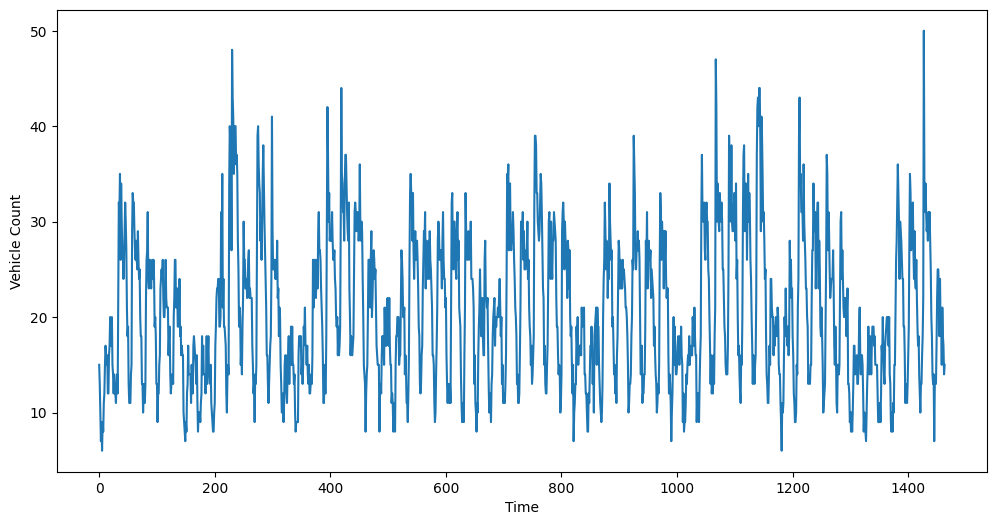

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data_2015_junc1["Vehicles"])
plt.xlabel('Time')
plt.ylabel('Vehicle Count')
plt.show()

In [8]:
import numpy.fft as fft

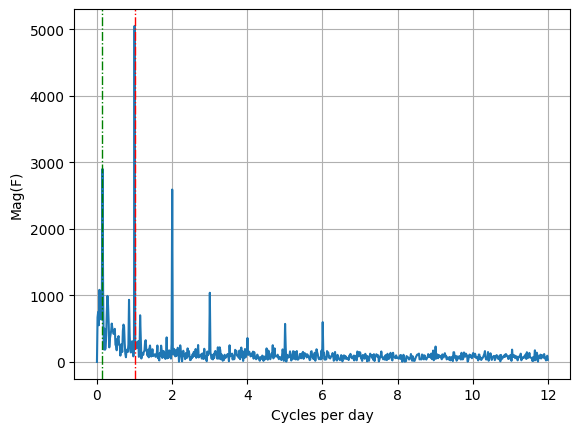

In [9]:
FFT = fft.fft(data_2015_junc1["Vehicles"])
#FFT = fft.fftshift(FFT)
X = np.linspace(0,24/2,len(FFT)//2)
F = abs(FFT)[0:len(FFT)//2]
F[0] = 0
plt.plot(X,F)
plt.xlabel("Cycles per day")
plt.ylabel("Mag(F)")
plt.axvline(x=1, color='red', linestyle='-.',linewidth=1)
plt.axvline(x=1/7, color='green', linestyle='-.',linewidth=1)
plt.grid()

In [10]:
def adf_test(timeseries):
    adf_result = adfuller(timeseries)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'   {key}: {value}')
    if adf_result[0] < adf_result[4]['5%']:
        print('Data is stationary')
    else:
        print('Data is non-stationary')

adf_test(data_2015_junc1['Vehicles'])

ADF Statistic: -3.670783196278489
p-value: 0.00454339629178666
Critical Values:
   1%: -3.4349024693573584
   5%: -2.8635506057382325
   10%: -2.5678404322793846
Data is stationary


/home/gautham/Desktop/ML_project/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


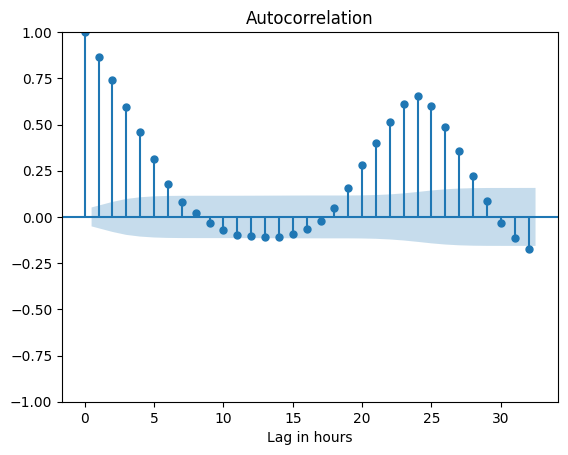

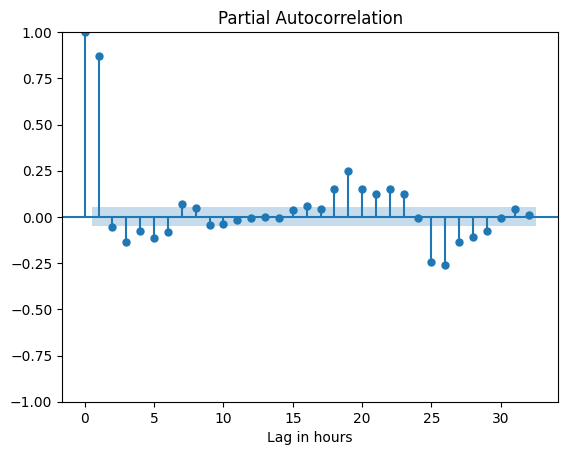

In [11]:
plot_acf(data_2015_junc1["Vehicles"])
plt.xlabel("Lag in hours")
plot_pacf(data_2015_junc1["Vehicles"])
plt.xlabel("Lag in hours")
plt.show()

In [12]:
train_data, test_data = train_test_split(data_2015_junc1, test_size=0.4, shuffle=False)

In [13]:
train_data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
873,2015-12-07 09:00:00,1,24,20151207091
874,2015-12-07 10:00:00,1,26,20151207101
875,2015-12-07 11:00:00,1,32,20151207111
876,2015-12-07 12:00:00,1,29,20151207121


In [14]:
test_data

,DateTime,Junction,Vehicles,ID
878,2015-12-07 14:00:00,1,28,20151207141
879,2015-12-07 15:00:00,1,27,20151207151
880,2015-12-07 16:00:00,1,22,20151207161
881,2015-12-07 17:00:00,1,25,20151207171
882,2015-12-07 18:00:00,1,24,20151207181
...,...,...,...,...
1459,2015-12-31 19:00:00,1,21,20151231191
1460,2015-12-31 20:00:00,1,18,20151231201
1461,2015-12-31 21:00:00,1,17,20151231211
1462,2015-12-31 22:00:00,1,14,20151231221


In [15]:
model = ARIMA(train_data["Vehicles"], order=(30,0,5))

In [16]:
results = model.fit()

/home/gautham/Desktop/ML_project/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
forecast = results.forecast(steps=500)
forecast

878     23.784756
879     22.909938
880     22.622617
881     24.031630
882     25.700790
          ...    
1373    19.872758
1374    20.082539
1375    20.358491
1376    20.640247
1377    20.869708
Name: predicted_mean, Length: 500, dtype: float64

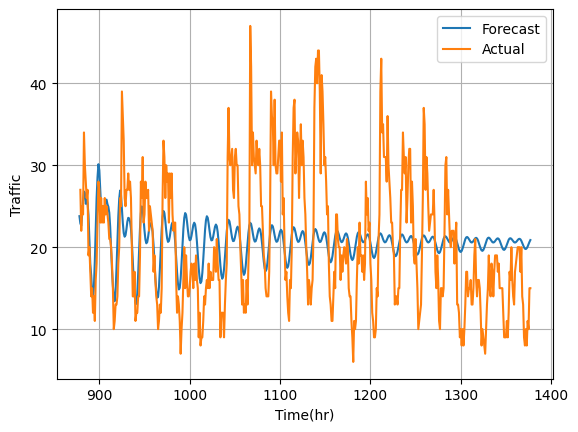

In [18]:
plt.plot(forecast,label="Forecast")
plt.plot(test_data["Vehicles"].iloc[1:500],label="Actual")
plt.xlabel("Time(hr)")
plt.ylabel("Traffic")
plt.legend()
plt.grid()

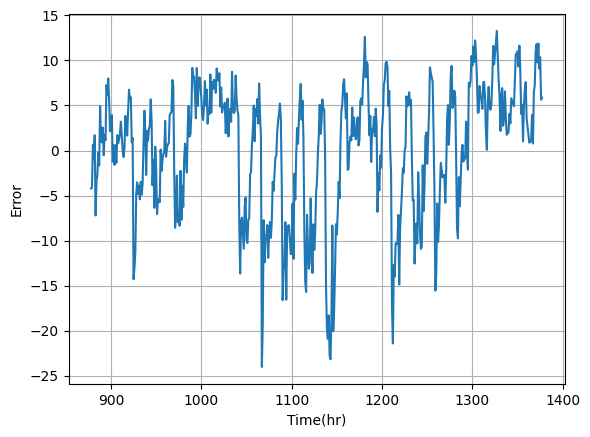

In [19]:
error = forecast - test_data["Vehicles"]
plt.plot(error)
plt.xlabel("Time(hr)")
plt.ylabel("Error")
plt.grid()

In [20]:
np.sqrt((error**2).mean())

7.154235278092389

In [21]:
data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224
